<a href="https://colab.research.google.com/github/tomohiko-urai/minnano_ai/blob/master/10_Feature_point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 特徴点によるマッチング

In [ ]:
!wget https://storage.googleapis.com/iotcolab2023/alphabet.png -O alphabet.png
!wget https://storage.googleapis.com/iotcolab2023/alphabet_a.png -O a.png
!wget https://storage.googleapis.com/iotcolab2023/alphabet_b.png -O b.png
!wget https://storage.googleapis.com/iotcolab2023/alphabet_c.png -O c.png
!wget https://storage.googleapis.com/iotcolab2023/alphabet_d.png -O d.png
!wget https://storage.googleapis.com/iotcolab2023/alphabet_e.png -O e.png
!wget https://storage.googleapis.com/iotcolab2023/alphabet_f.png -O f.png
!wget https://storage.googleapis.com/iotcolab2023/alphabet_q.png -O q.png
!wget https://storage.googleapis.com/iotcolab2023/alphabet_u.png -O u.png
!wget https://storage.googleapis.com/iotcolab2023/alphabet_z.png -O z.png

--2023-02-11 02:14:33--  https://storage.googleapis.com/iotcolab2023/alphabet.png
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15183 (15K) [image/png]
Saving to: ‘alphabet.png’

alphabet.png        100%[===================>]  14.83K  --.-KB/s    in 0s      

2023-02-11 02:14:34 (100 MB/s) - ‘alphabet.png’ saved [15183/15183]

--2023-02-11 02:14:34--  https://storage.googleapis.com/iotcolab2023/alphabet_a.png
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3274 (3.2K) [image/png]
Saving to: ‘a.png’

a.png               100%[==================

In [ ]:
import cv2
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os

from google.colab.patches import cv2_imshow

In [ ]:
filename = 'c' #@param ["a", "b", "c", "d", "e", "f", "q", "u", "z"]

imgA = cv2.imread('alphabet.png')
imgB = cv2.imread(filename + '.png')

In [ ]:
akaze = cv2.AKAZE_create()

kpA, desA = akaze.detectAndCompute(imgA, None)
kpB, desB = akaze.detectAndCompute(imgB, None)

bf = cv2.BFMatcher()

matches = bf.knnMatch(desA, desB, k = 2)

In [ ]:
ratio = 0.2 #@param {type:"slider", min:0.1, max:1.0, step:0.1}

good = []
for m, n in matches:
  if m.distance < ratio * n.distance:
    good.append([m])

print(len(good))

41


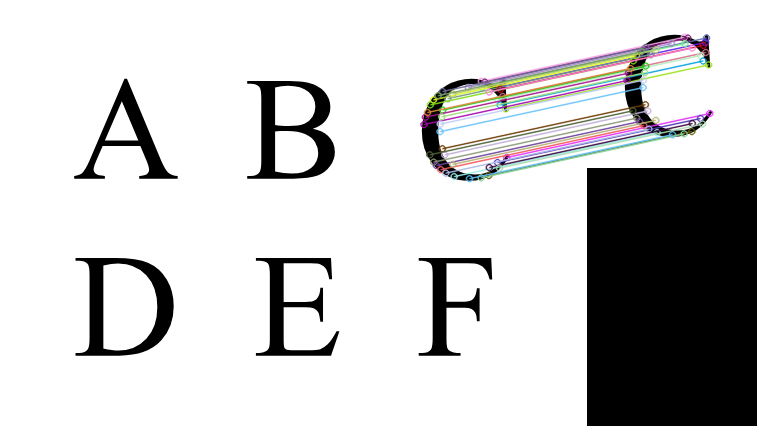

In [ ]:
# 対応する特徴点同士を描画
imgMatch = cv2.drawMatchesKnn(imgA, kpA, imgB, kpB, good, None, flags = 2)

# 画像表示
cv2_imshow(imgMatch)